# Toy Example

## Scaling Machine Learning Data

In [5]:
from pandas import read_csv
import pandas as pd
import math

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = read_csv('../pima-indians-diabetes.csv', names = names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002430B5A208>,
      dtype=object)

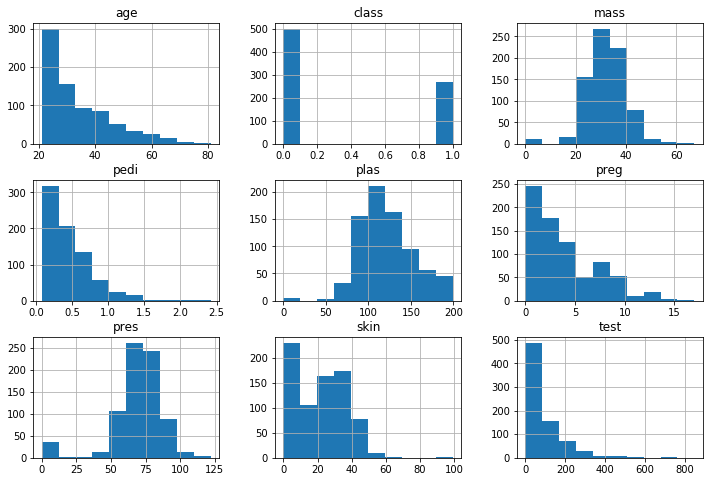

In [4]:
df.hist(figsize=(12,8))

In [3]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.iloc[0,:-1]

preg      6.000
plas    148.000
pres     72.000
skin     35.000
test      0.000
mass     33.600
pedi      0.627
age      50.000
Name: 0, dtype: float64

In [7]:
print("magnitude or length of vector : " + str(math.sqrt(sum(i**2 for i in df.iloc[0,:-1]))))

magnitude or length of vector : 178.82492312035254


In [11]:
df['class'].value_counts() 

0    500
1    268
Name: class, dtype: int64

In [4]:
len(df.columns)

9

In [7]:
print(df.loc[0])

preg       6.000
plas     148.000
pres      72.000
skin      35.000
test       0.000
mass      33.600
pedi       0.627
age       50.000
class      1.000
Name: 0, dtype: float64


In [8]:
df['preg'].min()

0

In [9]:
len(df)

768

## Normalization : Rescaling(0..1)

In [8]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

array = df.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_01 = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

print(rescaledX_01[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [15]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_feat = pd.DataFrame(data=rescaledX_01,columns=names)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000002433164E88>,
      dtype=object)

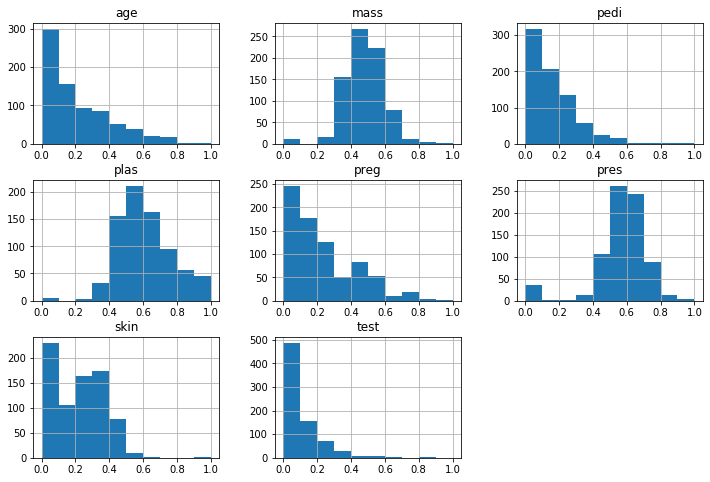

In [16]:
df_feat.hist(figsize=(12,8))

## Standardization 

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
rescaledX_standard = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(rescaledX_standard[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000242DD495C8>,
      dtype=object)

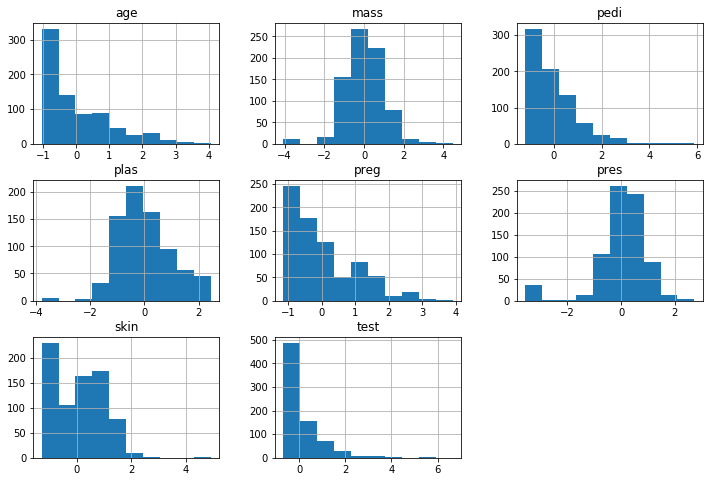

In [18]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age']
df_feat = pd.DataFrame(data=rescaledX_standard,columns=names)
df_feat.hist(figsize=(12,8))

## Normalization : Unit Norm

In [13]:
from sklearn.preprocessing import Normalizer

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [17]:
print("magnitude or length of vector : " + str(math.sqrt(sum(i**2 for i in normalizedX[0,:]))))

magnitude or length of vector : 1.0


In [18]:
print("magnitude or length of vector : " + str(math.sqrt(sum(i**2 for i in df.iloc[0,:-1]))))

magnitude or length of vector : 178.82492312035254


## Binarize Data (Make Binary)

After binarizing you can see that all values equal or less than 0 are marked 0 and all of those above 0 are
marked 1.

In [40]:
# binarization
from sklearn.preprocessing import Binarizer

# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
binarizer = Binarizer(threshold=0.0).fit(X)
binaryX = binarizer.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(binaryX[0:5,:])

[[1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1.]
 [1. 1. 1. 0. 0. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1.]]


**KNN**

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [35]:
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size = 0.2,random_state=7)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xTrain, yTrain)
prediction = knn.predict(xTest)
acc_KNN = accuracy_score(yTest, prediction)
acc_KNN

0.7077922077922078

In [36]:
xTrain, xTest, yTrain, yTest = train_test_split(rescaledX_01, Y, test_size = 0.2,random_state=7)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xTrain, yTrain)
prediction = knn.predict(xTest)
acc_KNN = accuracy_score(yTest, prediction)
acc_KNN

0.7337662337662337

In [37]:
xTrain, xTest, yTrain, yTest = train_test_split(rescaledX_standard, Y, test_size = 0.2,random_state=7)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xTrain, yTrain)
prediction = knn.predict(xTest)
acc_KNN = accuracy_score(yTest, prediction)
acc_KNN

0.7207792207792207

In [38]:
xTrain, xTest, yTrain, yTest = train_test_split(normalizedX, Y, test_size = 0.2,random_state=7)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xTrain, yTrain)
prediction = knn.predict(xTest)
acc_KNN = accuracy_score(yTest, prediction)
acc_KNN

0.6818181818181818

In [41]:
xTrain, xTest, yTrain, yTest = train_test_split(binaryX, Y, test_size = 0.2,random_state=7)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xTrain, yTrain)
prediction = knn.predict(xTest)
acc_KNN = accuracy_score(yTest, prediction)
acc_KNN

0.6298701298701299